<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 3</h1>

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - MLP Network</h1>

Un Multilayer Perceptron (MLP) è un feedforward neural network caratterizzata da più strati di nodi interconnessi (neuroni), tra cui uno strato di input, uno o più strati nascosti e uno strato di output.

<center>

![MLP](Immagini/Teoria/MLP.png)

</center>

In [16]:
# Richiedo dimensione dei layer della rete da inizializzare
nin = int(input("Dimensione strato di input: "))
nhid1 = int(input("Dimensione primo strato nascosto: "))
nhid2 = int(input("Dimensione secondo strato nascosto: "))
nout = int(input("Dimensione strato di output: "))


# Allocazione pesi e bias per i vari neuroni, sui quali verrà fatto l'addestramento della rete
# Tutte queste quantità devono essere delle variabili, perchè vanno cambiate in addestramento
# Dato che ad ogni connessione fra neuroni va assegnato un peso diverso, le quantità incluse nel
# primo dizionario sono delle matrici con un numero di righe pari ai neuroni "di partenza" ed un 
# numero di colonne pari a quello dei neuroni "d'arrivo". Questo perchè: y = x*W + b, ossia il 
# prodotto matriciale viene fatto al contrario. I bias sono invece vettori con lunghezza pari al numero
# di nodi dello strato a cui si riferiscono. Per creare tensori casuali utilizzo il metodo tf.random.normal
# che consente di generare un set di dati gaussiani la cui forma è uno dei parametri da specificare
pesi = {
    'hid1': tf.Variable(tf.random.normal([nin, nhid1])), 
    'hid2': tf.Variable(tf.random.normal([nhid1, nhid2])), 
    'out': tf.Variable(tf.random.normal([nhid2, nout]))
}

bias = {
    'hid1': tf.Variable(tf.random.normal([nhid1])),
    'hid2': tf.Variable(tf.random.normal([nhid2])),
    'out': tf.Variable(tf.random.normal([nout]))
}


# Funzione che prende input e fornisce come risultato l'output della rete neurale
# Vogliamo in definiva fare in modo esplicito i conti che portano alla produzione dell'output, 
# Per compiere le operazioni utilizzo delle funzioni della libreria tensorflow ed in particolare:
#
#   - matmul(a, b) --> consente di fare moltiplicazioni matriciali
#   - add(a, b) --> consente di sommare fra loro tensori
#
# Questo serve ad ogni step per capire dove valutare la funzione d'attivazione. In questo caso 
# vogliamo una sigmoide sui layer nascosti ed invece un comportamento lineare per l'output
def modMPL(indat):
    appo = tf.sigmoid(tf.add(tf.matmul(indat, pesi["hid1"]), bias["hid1"]))
    appo = tf.sigmoid(tf.add(tf.matmul(appo, pesi["hid2"]), bias["hid2"]))
    appo = tf.add(tf.matmul(appo, pesi["out"]), bias["out"])
    return appo


# Valutiamo output del modello per 10 valori equispaziati fra -1 ed 1
test = np.linspace(-1, 1, 10, dtype = np.float32)
print("Input della rete neurale: \n", test.reshape(-1, 1))
print("\n\nOutput della rete neurale: ", modMPL(test.reshape(-1, 1)))

Input della rete neurale: 
 [[-1.        ]
 [-0.7777778 ]
 [-0.5555556 ]
 [-0.33333334]
 [-0.11111111]
 [ 0.11111111]
 [ 0.33333334]
 [ 0.5555556 ]
 [ 0.7777778 ]
 [ 1.        ]]


Output della rete neurale:  tf.Tensor(
[[-1.2428458]
 [-1.2515835]
 [-1.2627645]
 [-1.2766579]
 [-1.292205 ]
 [-1.3070393]
 [-1.3190391]
 [-1.327625 ]
 [-1.3334216]
 [-1.3373427]], shape=(10, 1), dtype=float32)


<h1 style="color: blue; font-size:50px;"> Esercizio 2 - Sequential model</h1>

L'obiettivo di questo esercizio è tradurre l'esercizio precedente utilizzando le funzionalità sequenziali di TensorFlow/Keras. Un **modello sequenziale*** è appropriato per descrivere un sistema costituito da una serie di layers dei quali ciascuno presenta rispettivamente un solo tensore di input ed un solo tensore di output.

In [20]:
# Richiedo dimensione dei layer della rete da inizializzare
nin = int(input("Dimensione strato di input: "))
nhid1 = int(input("Dimensione primo strato nascosto: "))
nhid2 = int(input("Dimensione secondo strato nascosto: "))
nout = int(input("Dimensione strato di output: "))


# Definisco il modello sequenziale e le tipologie di layers (quelli nascosti hanno come funzione d'attivazione
# dei sigmoidi, mentre il layer di output deve essere lineare). Come argomento di keras.Sequential dobbiamo 
# specificare i piani di nodi che vogliamo connettere fra loro. In questo caso scelgo dei layer Dense, ossia 
# fully connected, e per ciascuno di questi indico quanti siano i nodi costituenti, la funzione d'attivazione e 
# il nome del piano. Se non viene specificato alcun argomento per activation, il comportamento dei nodi sarà lineare.
model = keras.Sequential(
    [
        layers.Dense(nhid1, activation = "sigmoid", name = "hid1"), 
        layers.Dense(nhid2, activation = "sigmoid", name = "hid2"), 
        layers.Dense(nout, name = "out"),
    ]
)


# Riporto l'implementazione del vecchio modello per verificare che le capacità predittive dei due
# siano in accordo fra loro (e che quindi siano effettivamente uno la traduzione dell'altro)
pesi = {
    'hid1': tf.Variable(tf.random.normal([nin, nhid1])), 
    'hid2': tf.Variable(tf.random.normal([nhid1, nhid2])), 
    'out': tf.Variable(tf.random.normal([nhid2, nout]))
}

bias = {
    'hid1': tf.Variable(tf.random.normal([nhid1])),
    'hid2': tf.Variable(tf.random.normal([nhid2])),
    'out': tf.Variable(tf.random.normal([nout]))
}

def modMPL(indat):
    appo = tf.sigmoid(tf.add(tf.matmul(indat, pesi["hid1"]), bias["hid1"]))
    appo = tf.sigmoid(tf.add(tf.matmul(appo, pesi["hid2"]), bias["hid2"]))
    appo = tf.add(tf.matmul(appo, pesi["out"]), bias["out"])
    return appo

# Stampo a video il riassunto del modello, che consente di valutarne l'architettura
# Per stampare è necessario provare il modello su un input standard
x = tf.ones((10, 1))
y = model(x)
model.summary()

# Verifico le capacità predeittive dei due modelli usando come input 10 valori equispaziati fra -1 ed 1
# Per vedere se il modello ha le stesse caratteristiche di quello precedente assegnamo gli stessi pesi e 
# gli stessi bias. Per fare questo utilizziamo la funzione set_weights, che fissa il valore dei pesi a partire 
# da una lista di array numpy (bisogna specificare sia il peso, che il bias). Il confronto fra output lo faccio 
# in modo automatico, ossia usando la funzione allclose
test = np.linspace(-1, 1, 10, dtype = np.float32).reshape(-1, 1)
model.set_weights(
    [
        pesi["hid1"], bias["hid1"],
        pesi["hid2"], bias["hid2"],
        pesi["out"], bias["out"]
    ]
)

outMLP = modMPL(test)
outSeq = model(test)

if not np.allclose(outMLP, outSeq):
    print("Output discrepanti! Errore in costruzione delle reti neurali!")
    print("\nOutput vecchio modello: ", outMLP)
    print("\nOutput modello sequenziale: ", outSeq)

else:
    print("Le due reti neurali producono lo stesso output!")


# Stampo i pesi del modello (che sono uguali sia per quello con moltiplicazioni matrciali 
# esplicite, che per quello che usa gli strumenti di keras) utilizzando la flag .weights
print("\n\nPesi del modello: ")
model.weights

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hid1 (Dense)                    │ (10, 5)                │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hid2 (Dense)                    │ (10, 2)                │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (10, 1)                │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

Le due reti neurali producono lo stesso output!


Pesi del modello: 


[<Variable path=sequential_16/hid1/kernel, shape=(1, 5), dtype=float32, value=[[-0.49099052  0.592398   -0.77512896 -0.6804413  -0.33347145]]>,
 <Variable path=sequential_16/hid1/bias, shape=(5,), dtype=float32, value=[-0.3849648  -0.05356302 -0.6304463   0.46109116 -1.1896571 ]>,
 <Variable path=sequential_16/hid2/kernel, shape=(5, 2), dtype=float32, value=[[-0.43022877  0.418887  ]
  [ 0.00744309 -0.14922425]
  [ 0.00177292 -0.02002541]
  [ 0.50097203 -1.6511942 ]
  [ 0.8370611  -0.19532157]]>,
 <Variable path=sequential_16/hid2/bias, shape=(2,), dtype=float32, value=[-0.46822706  0.73423445]>,
 <Variable path=sequential_16/out/kernel, shape=(2, 1), dtype=float32, value=[[-0.7369044]
  [ 1.3589365]]>,
 <Variable path=sequential_16/out/bias, shape=(1,), dtype=float32, value=[-0.660612]>]

<h1 style="color: blue; font-size:50px;"> Esercizio 3 - Manual training</h1>

Funzione di costo del modello:  14.5167675


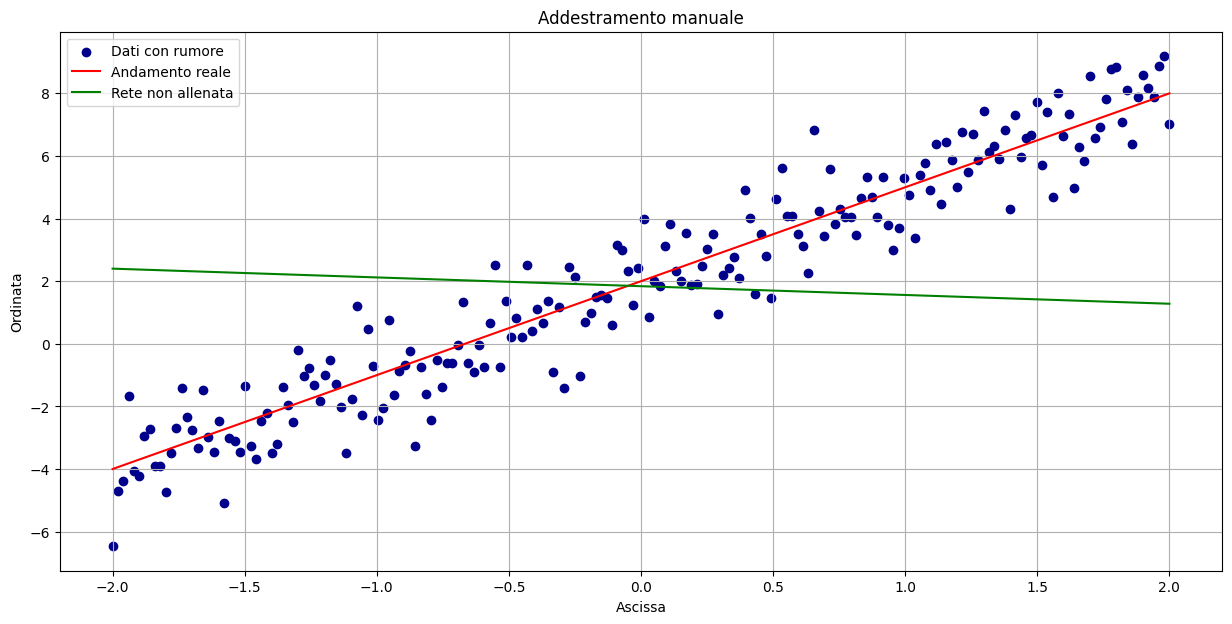

In [59]:
# Genero i dati della funzione target del fit, sui quali manualmente allenare la mia rete
# Li stampo a video, in modo tale da verificare le caratteristiche del dataset considerato
x = np.linspace(-2, 2, 200, dtype = np.float32)
trueY = 3*x + 2                                          #Valori veri
noiseY = trueY + np.random.normal(0, 1, 200)             #Valori "rumorosi"


# Definisco un modello (che alla fine è un solo neuroen dato che ho una capacità rappresentativa
# lineare) che fornisca come output "W*x + b" dove sia W che b sono stati inizializzati casualmente
# Per fare questo sfrutto l'ereditarietà della classe tf.Module, che è uno degli oggetti base della
# libreria tensorflow. Per questo motivo definisco una nuova classe, che chiamo myMod, figlia della
# classe tf.Module, per la quale i pesi e il bias sono dei tensori generati secondo una distribuzione
# gaussiana e la funzione __call__ svolge l'operazione precedentemente indicata

class myMod(tf.Module):
  
  def __init__(self, nguess, name=None):
    # Costruttore della classe, pesi e bias sono generati 
    # per mezzo di una distribuzione gaussiana
    super().__init__(name=name)
    self.w = tf.Variable(tf.random.normal([1]), name='w')
    self.b = tf.Variable(tf.random.normal([1]), name='b')
    self.y = tf.Variable(tf.zeros([nguess]))

  def __call__(self, x):
    # Metodo che consente di calcolare la predizioni del modello
    # In questa fase vengono compiute semplici operazioni di natura matriciale 
    self.y = self.w * x + self.b
    return self.y
  
  def lossF(self, trueY):
    # Definisco la funzione di costo, necessaria per l'allenamento del modello
    # Richiede in input trueY perchè vogliamo che sia calcolato l'errore quadratico medio

    if len(trueY) != len(self.y):
      raise ValueError("Problemi in calcolo funzione di costo: dimensioni non compatibili fra true data e guess modello!")
    else:
        return tf.reduce_mean(tf.square(trueY - self.y)).numpy()

model = myMod(200)
y = model.__call__(x)

print("Funzione di costo del modello: ", model.lossF(trueY))

fig = plt.figure(figsize = (15,7))
plt.scatter(x, noiseY, color = 'darkblue', label = "Dati con rumore")
plt.plot(x, trueY, color = 'red', label = "Andamento reale")
plt.plot(x, y.numpy(), color = 'green', label = "Rete non allenata")

plt.title("Addestramento manuale")
plt.xlabel("Ascissa")
plt.ylabel("Ordinata")

plt.legend(loc = "best")
plt.grid(True)
plt.show()